(100, 176, 2, 11)


/tmp/ipykernel_126369/3273131707.py:58: RuntimeWarning: invalid value encountered in true_divide
  midcfad[:,j,i]=AllCFAD[:,j,1,i]/float(np.sum(AllCFAD[:,j,1,i]))
/tmp/ipykernel_126369/3273131707.py:59: RuntimeWarning: invalid value encountered in true_divide
  tropcfad[:,j,i]=AllCFAD[:,j,0,i]/float(np.sum(AllCFAD[:,j,0,i]))


0 0 1
0 1 2
1 0 3
1 1 4
2 0 5
2 1 6
3 0 7
3 1 8
4 0 9
4 1 10


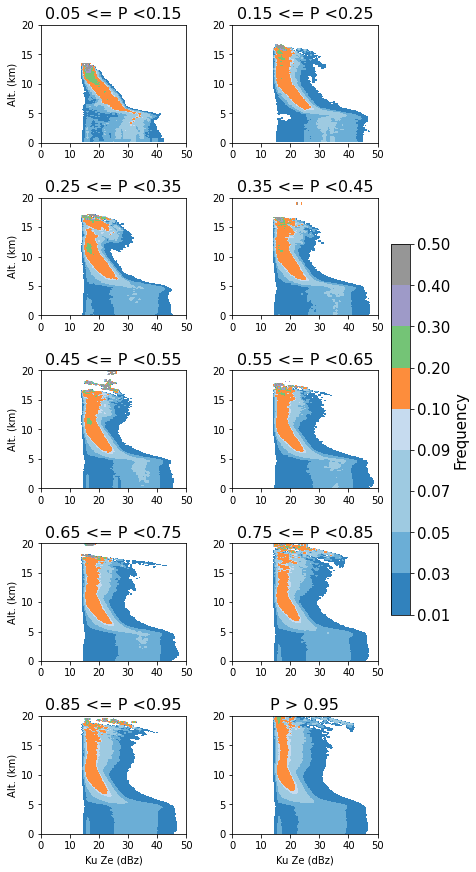

max of colocation 48 6948 (72, 36)


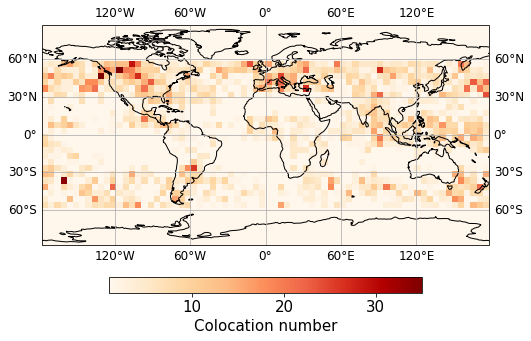

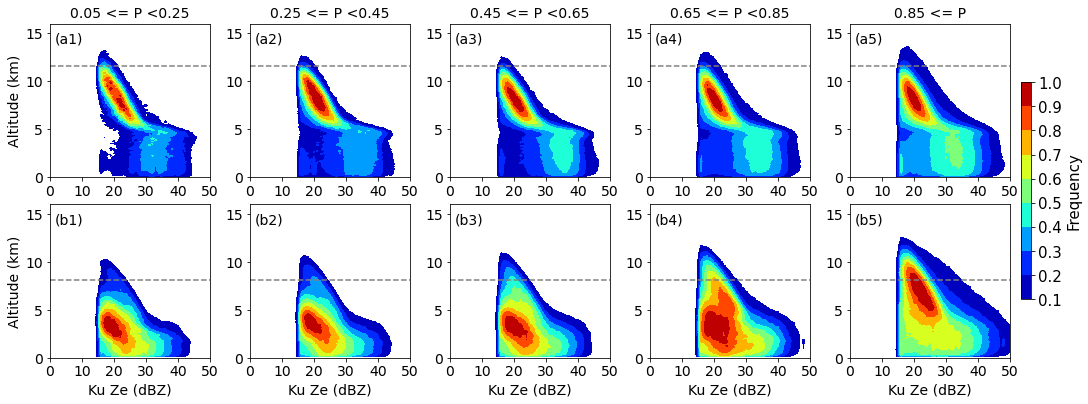

In [1]:
## visualize results from plot_cfad_gpm_modis
# import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import cartopy.crs as ccrs
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER

year=['2014','2015','2016','2017','2018','2019','2020']

AllCFAD=np.zeros((100,176,2,11),'i')
Allnumb=np.zeros((72,36),'i')

for i in range(7):
    fname='/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_cfad_number_'+year[i]+'.h5'
    fid = h5py.File(fname,'r')
    CFAD= fid['CFAD'][:] # dimension, 0-100 dbz, height, 0-tropics, 1-midlatitude, 11-probability
    numb= fid['Colocated_number'][:] 
    AllCFAD = AllCFAD+CFAD
    Allnumb = Allnumb+numb
    fid.close()
    
#==== to plot ====
xdbz=np.arange(100)
gpm_center_altitude=(176-np.arange(176))*0.125
print(AllCFAD.shape)
midcfad=np.zeros((100,176,11),'f')
tropcfad=np.zeros((100,176,11),'f')
pdata=AllCFAD[:,:,1,6]

midcfad2=np.zeros((100,176,5),'f')
tropcfad2=np.zeros((100,176,5),'f')

#p=plt.contourf(pdata,20,cmap='seismic')
#plt.show()

a=5
b=2
c=1
title=['0.05 <= P <0.15','0.15 <= P <0.25','0.25 <= P <0.35','0.35 <= P <0.45','0.45 <= P <0.55',\
       '0.55 <= P <0.65','0.65 <= P <0.75','0.75 <= P <0.85','0.85 <= P <0.95','P > 0.95']
ytitle=['Alt. (km)',' ','Alt. (km)',' ','Alt. (km)',' ','Alt. (km)',' ','Alt. (km)',' ']
xtitle=['',' ','',' ','',' ','',' ','Ku Ze (dBz)','Ku Ze (dBz)']

fig, axs=plt.subplots(a,b,figsize=[6.5,12],constrained_layout=True)
#print(dir(axs))
#fig.subplots_adjust(hspace=0.5)

for i in range(10):
    i=i+1
    for j in np.arange(176):
        
        midcfad[:,j,i]=AllCFAD[:,j,1,i]/float(np.sum(AllCFAD[:,j,1,i]))
        tropcfad[:,j,i]=AllCFAD[:,j,0,i]/float(np.sum(AllCFAD[:,j,0,i]))

    #=== to plot ==== 
    #plt.subplot(a,b,c, adjustable='box')
    x1=int((i-1)/2)
    x2=int((i-1) % 2)
    print(x1,x2,i)
    p=axs[x1,x2].contourf(xdbz,gpm_center_altitude,np.transpose(tropcfad[:,:,i]),[0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5],\
                    cmap='tab20c')
    axs[x1,x2].set_title(title[i-1],fontsize=16)
    axs[x1,x2].set_ylabel(ytitle[i-1])
    axs[x1,x2].set_xlabel(xtitle[i-1])
    axs[x1,x2].set_xlim([0,50])
    axs[x1,x2].set_ylim([0,20])
    axs[x1,x2].set_xticks([0,10,20,30,40,50])
   
    #fig.subplots_ajust(hspace=0.5)
    #plt.xlim([0,50])
    #plt.ylim([0,20])
    #plt.title(title[i-1])
    #plt.xlabel(xtitle[i-1])
    #plt.ylabel(ytitle[i-1])
    c=c+1
    #plt.clabel(p1,inline=True,fontsize=8)
    #plt.colorbar(p1,label='Frequency')      
    #print(np.nanmax(midcfad),np.nanmax(tropcfad))
    #print(np.transpose(midcfad[:,:,6]).shape)

#plt.colorbar(p1,label='Frequency') 
#plt.show()
cb=fig.colorbar(p,ax=axs[1:4,1],shrink=0.8)
cb.ax.tick_params(labelsize=15)
cb.set_label(label='Frequency',size=15)
plt.show()

#=== to plot all colocation ===
print('max of colocation',np.max(Allnumb),np.sum(Allnumb),Allnumb.shape)
fig1=plt.figure(figsize=([8,6]))
img_extent=(-177.5,177.5,-87.5,87.5)
ax=plt.axes(projection=ccrs.PlateCarree())
Allnumb1=Allnumb.T
Allnumb2=Allnumb1[::-1]
p2=ax.imshow(Allnumb2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=1,vmax=35,cmap='OrRd')
ax.coastlines(resolution='110m', color='black', linewidth=1)
gl=ax.gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}

cb1=fig1.colorbar(p2,orientation='horizontal',shrink=0.7,pad=0.1)
cb1.ax.tick_params(labelsize=15)
cb1.set_label(label='Colocation number',size=15)
plt.show()

#p2=plt.imshow(Allnumb,cmap='tab20c')
#plt.show()
#==== to plot in five panels =======
k=0
for i in np.arange(5):
    for j in np.arange(176):
        k=i+1
        midcfad2[:,j,i]=(AllCFAD[:,j,1,2*k]+AllCFAD[:,j,1,2*k-1])/float(np.max(AllCFAD[:,:,1,2*k-1]+AllCFAD[:,:,1,2*k]))
        tropcfad2[:,j,i]=(AllCFAD[:,j,0,2*k]+AllCFAD[:,j,0,2*k-1])/float(np.max(AllCFAD[:,:,0,2*k-1]+AllCFAD[:,:,0,2*k]))

title=['0.05 <= P <0.25','0.25 <= P <0.45','0.45 <= P <0.65',\
     '0.65 <= P <0.85','0.85 <= P']
subtitle1=['(a1)','(a2)','(a3)','(a4)','(a5)']
subtitle2=['(b1)','(b2)','(b3)','(b4)','(b5)']
fontsz=14
#font = ImageFont.truetype("sans-serif.ttf", fontsz)
# draw.text((x, y),"Sample Text",(r,g,b))
# overplot tropopause height lat (-25,25) 11559.267643564357, lat (> 25 or < -25) 8138.5325571428575
trop_tropopause=np.zeros((100),'f')
mid_tropopause=np.zeros((100),'f')
trop_tropopause[:]=11.559
mid_tropopause[:]=8.138

fig, axs=plt.subplots(2,5,figsize=[15,5.5],constrained_layout=True)

for i in np.arange(5):
        p=axs[0,i].contourf(xdbz,gpm_center_altitude,np.transpose(tropcfad2[:,:,i]),[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],\
                    cmap='jet')
        t=axs[0,i].plot(xdbz,trop_tropopause,color='grey',linestyle='dashed')
        p1=axs[1,i].contourf(xdbz,gpm_center_altitude,np.transpose(midcfad2[:,:,i]),[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],\
                    cmap='jet')
        t1=axs[1,i].plot(xdbz,mid_tropopause,color='grey',linestyle='dashed')
        
        axs[0,i].set_title(title[i],fontsize=fontsz)
        axs[0,0].set_ylabel('Altitude (km)',fontsize=fontsz)
        axs[1,0].set_ylabel('Altitude (km)',fontsize=fontsz)
        axs[1,i].set_xlabel('Ku Ze (dBZ)',fontsize=fontsz)
        axs[0,i].set_xlim([0,50])
        axs[1,i].set_xlim([0,50])
        axs[0,i].set_ylim([0,16])
        axs[1,i].set_ylim([0,16])
        axs[0,i].set_xticks([0,10,20,30,40,50])
        axs[1,i].set_xticks([0,10,20,30,40,50])
        axs[0,i].tick_params(labelsize=fontsz)
        axs[1,i].tick_params(labelsize=fontsz)
        axs[0,i].text(0.12,0.9,subtitle1[i],horizontalalignment='center', verticalalignment='center', transform=axs[0,i].transAxes,fontsize=fontsz)
        axs[1,i].text(0.12,0.9,subtitle2[i],horizontalalignment='center', verticalalignment='center', transform=axs[1,i].transAxes,fontsize=fontsz)

cb=fig.colorbar(p,ax=axs[0:2,4],shrink=0.65,pad=0.01)
cb.ax.tick_params(labelsize=15)
cb.set_label(label='Frequency',size=fontsz+1)


In [5]:
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


In [7]:
print(round(0.3),round(0.5),round(0.7),round(1.1),round(1.5),round(1.6))

0 0 1 1 2 2
